## Dataset Description:
This dataset encompasses a comprehensive collection of vehicle performance and environmental metrics captured through various sensors and data logging mechanisms. It initially includes readings on Altitude, CO2 emission levels, Coolant temperature, Instantaneous fuel consumption (measured in Litres per 100km), GPS Speed, Latitude, Longitude, OBD (On-Board Diagnostics) Speed, and RPM (Revolutions Per Minute). As part of data preprocessing to enhance analytical clarity and focus on relevant features for analysis, the features for Altitude, Latitude, and Longitude are subsequently omitted due to their limited impact on the primary objectives of the study. Additionally, a refined feature called "Speed" is introduced by calculating the average of OBD Speed and GPS Speed, providing a more accurate representation of the vehicle's movement.

Objective:
1. **Investigate CO2 Emission Levels**: Determine the correlation between CO2 emissions and other vehicle performance metrics to identify potential factors influencing emission rates.
2. **Data Summary and Variable Exploration**: Provide a detailed summary of the dataset statistics and conduct a univariate analysis to understand the distribution and characteristics of each variable.
3. **Feature Relationship Analysis**: Explore the relationship between fuel consumption (Litre per 100km) and other factors such as Speed, RPM, and Coolant temperature to identify patterns and insights.
4. **Speed Analysis**: Analyze the newly created "Speed" feature by comparing the relationships and discrepancies between the original OBD Speed and GPS Speed measurements.
5. **Insights and Predictive Analysis**: Utilize the dataset to uncover insights into vehicle performance under various conditions and potentially predict fuel efficiency and emission levels based on the compiled sensor data.

This dataset aims to provide a multi-dimensional view of vehicle performance, environmental impact, and operational efficiency, offering valuable insights for environmental researchers, automotive engineers, and data scientists interested in vehicular analytics and sustainability studies.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
##### Importing the dataset
df = pd.read_csv('OBD_2_dataset.csv')
df = df.drop('Unnamed: 0', axis=1)
df.corr()
df['Speed'] = (df['GPS Speed'] + df['OBD Speed']) / 2
df = df.drop(['GPS Speed','OBD Speed'], axis=1)

y = df.iloc[:, [3]].values
X = df.drop('Litre per 100km(Instant)', axis=1).values

## Data Analysis

In [5]:
df

,Altitude,CO2,Coolant,Litre per 100km(Instant),Latitude,Longitude,RPM,Speed
0,199.590000,0.000000,58.0,0.000000,59.841400,10.829169,783.0,0.000
1,199.437143,0.000000,58.0,0.000000,59.841400,10.829169,779.0,0.000
2,199.120000,0.000000,58.0,0.000000,59.841400,10.829169,778.0,0.000
3,199.121429,0.000000,58.0,0.000000,59.841400,10.829169,778.0,0.000
4,199.130000,0.000000,58.0,0.000000,59.841400,10.829169,1716.0,0.000
...,...,...,...,...,...,...,...,...
892,130.287143,187.734286,82.0,7.095714,59.860293,10.830779,2937.0,91.195
893,129.990000,281.100000,82.0,10.630000,59.860088,10.830819,2945.0,91.035
894,129.487143,281.430000,81.0,10.642857,59.859833,10.830876,2948.0,91.305
895,129.110000,279.031429,82.0,10.550000,59.859608,10.830932,2959.0,91.040


In [9]:
##### OLS Summary
import statsmodels.api as sm
X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.model.data.xnames = ['const','Altitude','CO2','Coolant','Latitude', 'Longitude','RPM','Speed']
regressor_OLS.summary()

X_opt = X[:, [0, 1, 2, 3, 4, 6, 7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.model.data.xnames = ['const','Altitude','CO2','Coolant','Latitude','RPM','Speed']
regressor_OLS.summary()

X_opt = X[:, [0, 2, 3, 6, 7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.model.data.xnames = ['const','CO2','Coolant','RPM','Speed']
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     250.0
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          5.27e-144
Time:                        11:24:11   Log-Likelihood:                -2756.2
No. Observations:                 897   AIC:                             5522.
Df Residuals:                     892   BIC:                             5546.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.7169    153.436      1.393      0.164     -87.420     514.854
CO2            0.0225      0.010      2.338      0.020       0.004       0.041
Coolant        0.0345      0.001     29.050      0.000       0.032       0.037
RPM          -19.9867     14.292     -1.398      0.162     -48.036       8.063
Speed       2.372e-05      0.000      0.067      0.947      -0.001       0.001
==============================================================================
Omnibus:                     1536.793   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           809419.414
Skew:                          11.171   Prob(JB):                         0.00
Kurtosis:                     148.456   Cond. No.                     1.95e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Columns chosen are C02, Coolant, RPM, Speed
df = df.drop(['Latitude','Longitude','Altitude'], axis=1)
X = df.drop('Litre per 100km(Instant)',axis=1).values

In [11]:
##### Splitting data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 6)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\Aishwarya Daga\AppData\Local\Temp\ipykernel_24100\402029682.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

## Bivariate Analysis

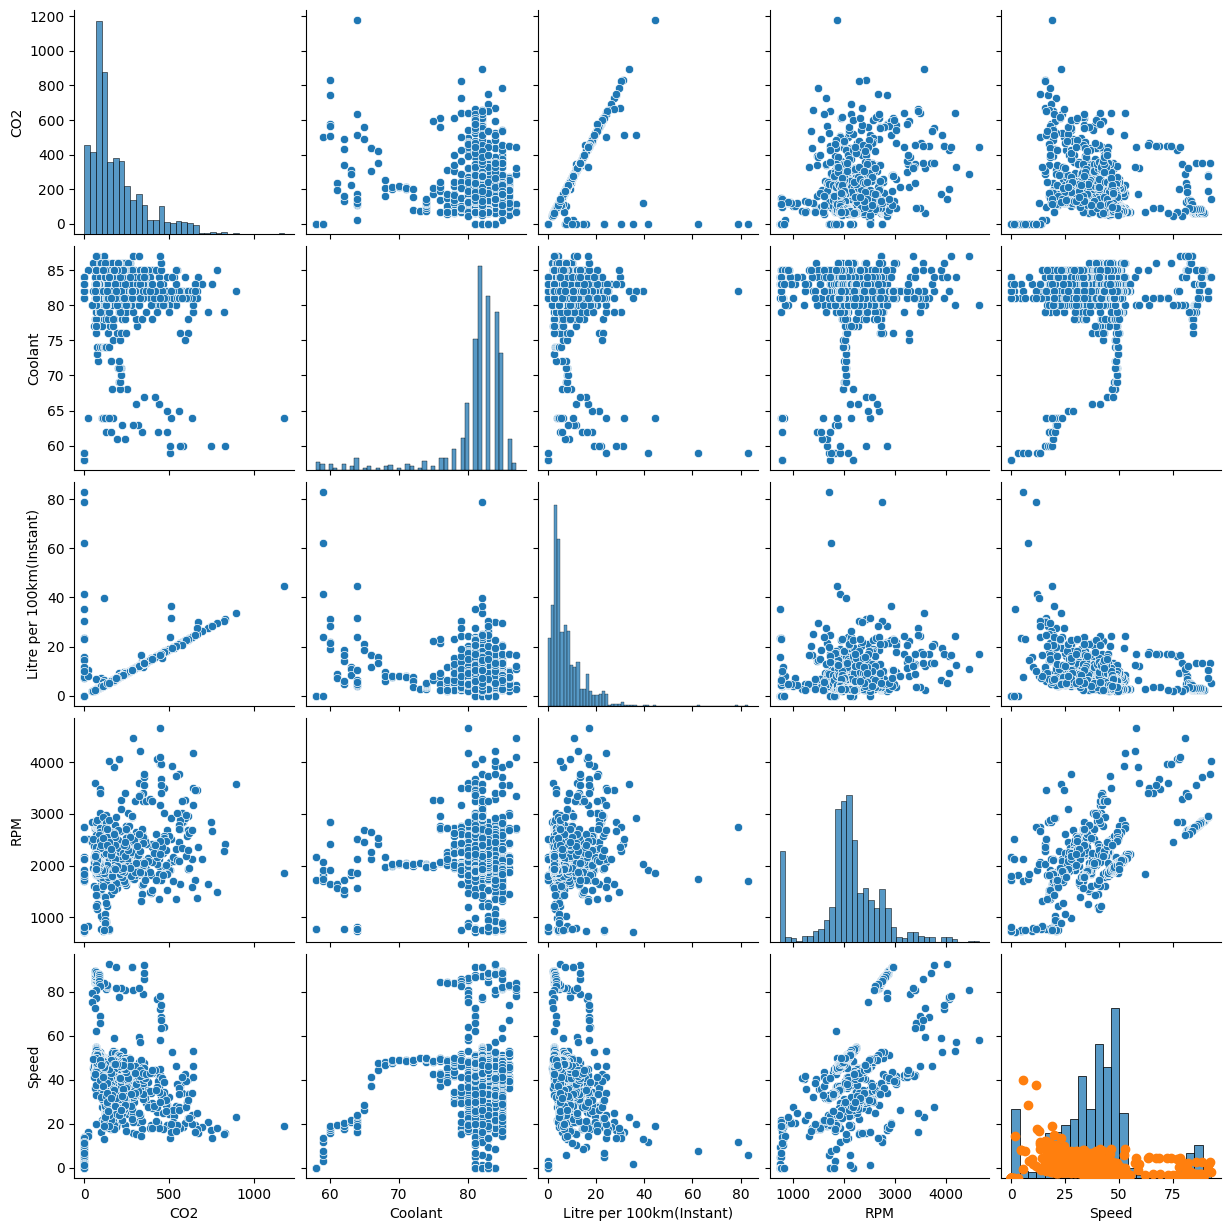

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

# Assuming X is a numpy.ndarray and you want to plot the 4th column (index 3) against y
plt.scatter(X[:, 3], y)  # Use standard numpy indexing instead of .iloc
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
reg = GBR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

c:\Users\Aishwarya Daga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
reg.score(X_test, y_test)

0.8449586796004886

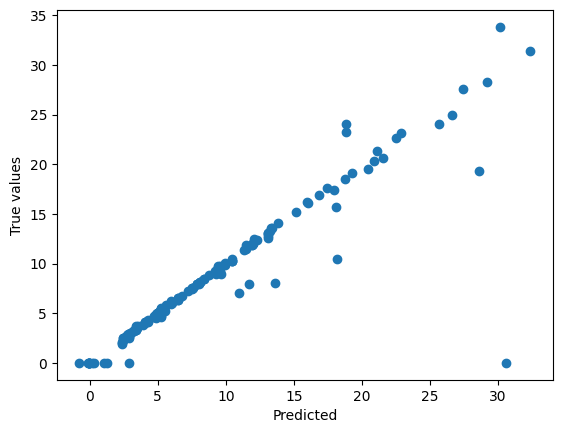

In [22]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.show()

In [24]:
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)

total = y_pred - y_test
print('Mean = ', np.mean(total), '\n', 'STD = ', np.std(total))

Mean =  0    0.369638
dtype: float64 
 STD =  0    2.592192
dtype: float64


c:\Users\Aishwarya Daga\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


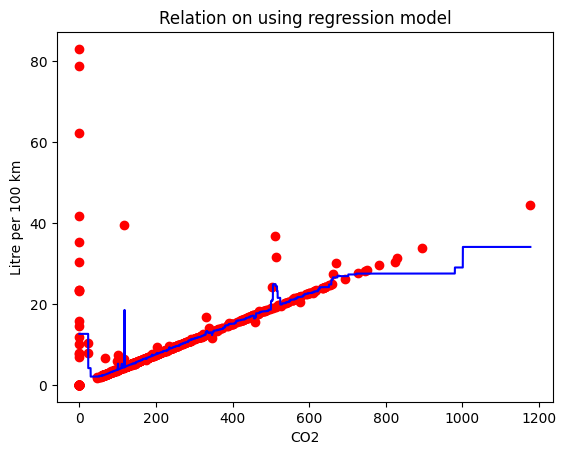

In [31]:
import numpy as np
import matplotlib.pyplot as plt

feature_index = 0 
X_means = np.mean(X, axis=0)
X_grid = np.arange(min(X[:, feature_index]), max(X[:, feature_index]), 0.01)
X_grid = X_grid.reshape(-1, 1)
X_dummy = np.tile(X_means, (len(X_grid), 1))
X_dummy[:, feature_index] = X_grid.ravel()

# Plotting
plt.scatter(X[:, feature_index], y, color='red') 
plt.plot(X_grid, regressor.predict(X_dummy), color='blue')  

# Adding titles and labels
plt.title('Relation on using regression model')
plt.xlabel('CO2')
plt.ylabel('Litre per 100 km')

plt.show()

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply polynomial features transformation
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Transform test data in the same way

# Fit the Ridge regression model on the transformed training data
linreg = Ridge().fit(X_train_poly, y_train)

# Printing model coefficients
print('(poly deg 3 + ridge) linear model coeff (w):\n', linreg.coef_)

# Handling the intercept, considering it could be an array if y_train is multidimensional
if isinstance(linreg.intercept_, np.ndarray):
    print('(poly deg 3 + ridge) linear model intercepts (b):', linreg.intercept_)
else:
    print('(poly deg 3 + ridge) linear model intercept (b): {:.3f}'.format(linreg.intercept_))

# Model evaluation
print('(poly deg 3 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train_poly, y_train)))
print('(poly deg 3 + ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test_poly, y_test)))

(poly deg 3 + ridge) linear model coeff (w):
 [[ 0.00000000e+00 -9.77565262e-01 -1.47272493e+00  4.24154307e-01
  -2.55687986e-01  6.69209161e-04  2.27669291e-02 -3.47410024e-05
  -9.27625312e-03  9.03926801e-02 -1.06810128e-02 -1.43226464e-02
  -4.52655228e-05  6.58377253e-03 -1.44507638e-01 -1.88329328e-07
  -5.43548235e-06  7.13989984e-08 -4.48514932e-06 -1.40995298e-04
   5.51233812e-07  1.21901602e-04 -2.93742179e-08  2.05649422e-06
  -3.49207192e-05 -7.10746115e-04  6.60141293e-05  3.09839587e-04
   5.10475248e-07 -7.38754514e-05  1.39915983e-03  4.37341357e-09
  -4.48002353e-07  1.26422748e-05  3.40649017e-05]]
(poly deg 3 + ridge) linear model intercepts (b): [-87.85169995]
(poly deg 3 + ridge) R-squared score (training): 0.721
(poly deg 3 + ridge) R-squared score (test): 0.311


c:\Users\Aishwarya Daga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04735e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
